In [14]:
from Vissim_env_class import environment
from MasterDQN_Agent import MasterDQN_Agent

# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Single_Cross_Triple 8 actions DQN

In [15]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = "C:\\Users\\acabrejasegea\\Desktop\\15_Timescales_utc\\Timescales_and_Discount_Factor_in_UTC"

sim_length = 3601
timesteps_per_second = 1
learning_iterations = 10
actions_set = "all_actions"

agent_type = "DuelingDDQN"
Session_ID = "SCT_8act_DuelingDDQN_common_memory_generation_2"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [37]:
## DQN Hyperaramenters
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 5000
batch_size = 128

gamma = 0.9
alpha = 0.005

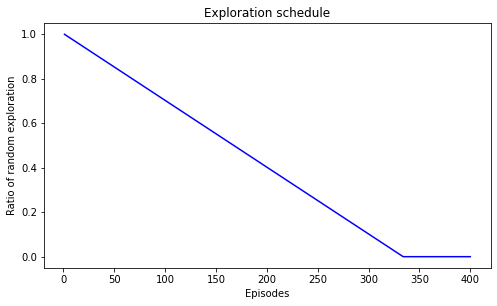

In [38]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "linear"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [39]:
Single_Cross_Triple8_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory,\
                                                       sim_length, Single_Cross_Triple_dictionary8,\
                                                       actions_set, gamma, alpha, agent_type,\
                                                       memory_size, PER_activated, batch_size,\
                                                       learning_iterations, copy_weights_frequency,\
                                                       epsilon_sequence,Random_Seed,\
                                                       timesteps_per_second, Session_ID,\
                                                       verbose = True)

INTERSECTION 0: SETTING UP AGENT
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 13)]         0                                            
__________________________________________________________________________________________________
dense_60 (Dense)                (None, 24)           336         input_11[0][0]                   
__________________________________________________________________________________________________
dense_61 (Dense)                (None, 24)           600         dense_60[0][0]                   
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 24)           600         dense_61[0][0]                   
__________________________________________________________

In [40]:
Single_Cross_Triple8_MultiDQN_Agents.prepopulate_memory()

Experience file not found. Generating now...
Working Directory set to: C:\Users\acabrejasegea\Desktop\15_Timescales_utc\Timescales_and_Discount_Factor_in_UTC
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Failed load attempt 1/5. Re-attempting.
Working Directory set to: C:\Users\acabrejasegea\Desktop\15_Timescales_utc\Timescales_and_Discount_Factor_in_UTC
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Model File load process successful.
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM

In [41]:
Single_Cross_Triple8_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\acabrejasegea\Desktop\15_Timescales_utc\Timescales_and_Discount_Factor_in_UTC
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Model File load process successful.
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting Deployments of Signal C

Random Seed Set to 117
Episode 17: Finished running.
Agent 0, Average Reward: -1167.04
1/1 - 0s - loss: 403.5495
1/1 - 0s - loss: 642.1719
1/1 - 0s - loss: 516.0325
1/1 - 0s - loss: 512.4126
1/1 - 0s - loss: 385.9888
1/1 - 0s - loss: 663.8277
1/1 - 0s - loss: 426.3775
1/1 - 0s - loss: 610.2044
1/1 - 0s - loss: 504.2627
1/1 - 0s - loss: 473.7882
Reducing exploration for all agents to 0.9489

Episode 18: Starting computation.
Random Seed Set to 118
Episode 18: Finished running.
Agent 0, Average Reward: -999.34
1/1 - 0s - loss: 591.7959
1/1 - 0s - loss: 562.7068
1/1 - 0s - loss: 464.1369
1/1 - 0s - loss: 402.8173
1/1 - 0s - loss: 370.2311
1/1 - 0s - loss: 520.5810
1/1 - 0s - loss: 513.0887
1/1 - 0s - loss: 408.3979
1/1 - 0s - loss: 391.9613
1/1 - 0s - loss: 362.6369
Reducing exploration for all agents to 0.9459

Episode 19: Starting computation.
Random Seed Set to 119
Episode 19: Finished running.
Agent 0, Average Reward: -875.24
Saving architecture, weights, optimizer state for best agen

1/1 - 0s - loss: 884.0272
1/1 - 0s - loss: 772.5463
1/1 - 0s - loss: 949.6962
1/1 - 0s - loss: 1252.6549
1/1 - 0s - loss: 1152.5448
1/1 - 0s - loss: 1046.2303
1/1 - 0s - loss: 1082.5089
1/1 - 0s - loss: 978.3016
1/1 - 0s - loss: 655.2192
Reducing exploration for all agents to 0.8948

Episode 36: Starting computation.
Random Seed Set to 136
Episode 36: Finished running.
Agent 0, Average Reward: -1087.85
1/1 - 0s - loss: 833.5324
1/1 - 0s - loss: 893.3594
1/1 - 0s - loss: 667.1432
1/1 - 0s - loss: 668.9224
1/1 - 0s - loss: 679.3233
1/1 - 0s - loss: 578.8237
1/1 - 0s - loss: 874.6443
1/1 - 0s - loss: 548.2042
1/1 - 0s - loss: 692.7748
1/1 - 0s - loss: 693.7940
Reducing exploration for all agents to 0.8918

Episode 37: Starting computation.
Random Seed Set to 137
Episode 37: Finished running.
Agent 0, Average Reward: -1157.67
1/1 - 0s - loss: 763.3217
1/1 - 0s - loss: 809.4360
1/1 - 0s - loss: 681.6513
1/1 - 0s - loss: 808.8076
1/1 - 0s - loss: 1183.1942
1/1 - 0s - loss: 714.5792
1/1 - 0s 

1/1 - 0s - loss: 1975.4844
1/1 - 0s - loss: 1387.6908
1/1 - 0s - loss: 2200.3782
1/1 - 0s - loss: 1886.0212
1/1 - 0s - loss: 2072.3899
Reducing exploration for all agents to 0.8408

Episode 54: Starting computation.
Random Seed Set to 154
Episode 54: Finished running.
Agent 0, Average Reward: -978.05
1/1 - 0s - loss: 1481.3159
1/1 - 0s - loss: 1312.8153
1/1 - 0s - loss: 1512.7598
1/1 - 0s - loss: 1336.5615
1/1 - 0s - loss: 1488.2651
1/1 - 0s - loss: 1908.0385
1/1 - 0s - loss: 1763.8533
1/1 - 0s - loss: 1117.5140
1/1 - 0s - loss: 1401.7266
1/1 - 0s - loss: 1384.1270
Reducing exploration for all agents to 0.8378

Episode 55: Starting computation.
Random Seed Set to 155
Episode 55: Finished running.
Agent 0, Average Reward: -1150.12
1/1 - 0s - loss: 1418.0151
1/1 - 0s - loss: 2125.9460
1/1 - 0s - loss: 1289.7863
1/1 - 0s - loss: 1463.0846
1/1 - 0s - loss: 1990.2461
1/1 - 0s - loss: 1895.6453
1/1 - 0s - loss: 1205.1333
1/1 - 0s - loss: 1285.1147
1/1 - 0s - loss: 1958.3167
1/1 - 0s - loss: 

1/1 - 0s - loss: 2133.1934
1/1 - 0s - loss: 1603.1205
1/1 - 0s - loss: 2606.2874
1/1 - 0s - loss: 2750.4282
1/1 - 0s - loss: 4320.3979
Reducing exploration for all agents to 0.7867

Episode 72: Starting computation.
Random Seed Set to 172
Episode 72: Finished running.
Agent 0, Average Reward: -1300.74
1/1 - 0s - loss: 1545.8694
1/1 - 0s - loss: 1654.6511
1/1 - 0s - loss: 2110.7458
1/1 - 0s - loss: 2010.3522
1/1 - 0s - loss: 1567.4131
1/1 - 0s - loss: 2171.5645
1/1 - 0s - loss: 2157.8157
1/1 - 0s - loss: 2222.4749
1/1 - 0s - loss: 3137.9783
1/1 - 0s - loss: 1817.1481
Reducing exploration for all agents to 0.7837

Episode 73: Starting computation.
Random Seed Set to 173
Episode 73: Finished running.
Agent 0, Average Reward: -1539.93
1/1 - 0s - loss: 2515.5361
1/1 - 0s - loss: 3256.5442
1/1 - 0s - loss: 1820.9358
1/1 - 0s - loss: 2063.4600
1/1 - 0s - loss: 1497.6387
1/1 - 0s - loss: 1706.3116
1/1 - 0s - loss: 1892.1003
1/1 - 0s - loss: 2262.0156
1/1 - 0s - loss: 2326.0422
1/1 - 0s - loss:

1/1 - 0s - loss: 3870.4016
1/1 - 0s - loss: 2851.0520
1/1 - 0s - loss: 4182.0688
Reducing exploration for all agents to 0.7326

Episode 90: Starting computation.
Random Seed Set to 190
Episode 90: Finished running.
Agent 0, Average Reward: -1374.36
1/1 - 0s - loss: 2304.7471
1/1 - 0s - loss: 4291.3965
1/1 - 0s - loss: 1913.0181
1/1 - 0s - loss: 2694.1841
1/1 - 0s - loss: 3825.2878
1/1 - 0s - loss: 2426.3987
1/1 - 0s - loss: 2278.5911
1/1 - 0s - loss: 2064.3728
1/1 - 0s - loss: 2613.5874
1/1 - 0s - loss: 2273.7261
Reducing exploration for all agents to 0.7296

Episode 91: Starting computation.
Random Seed Set to 191
Episode 91: Finished running.
Agent 0, Average Reward: -1156.34
1/1 - 0s - loss: 2698.5586
1/1 - 0s - loss: 2710.7063
1/1 - 0s - loss: 2295.2615
1/1 - 0s - loss: 2348.6096
1/1 - 0s - loss: 2308.1130
1/1 - 0s - loss: 2832.1321
1/1 - 0s - loss: 2937.2654
1/1 - 0s - loss: 2403.2307
1/1 - 0s - loss: 2511.8660
1/1 - 0s - loss: 2599.5183
Reducing exploration for all agents to 0.72

1/1 - 0s - loss: 3918.7864
Reducing exploration for all agents to 0.6785

Episode 108: Starting computation.
Random Seed Set to 208
Episode 108: Finished running.
Agent 0, Average Reward: -1462.22
1/1 - 0s - loss: 4804.9536
1/1 - 0s - loss: 5255.2944
1/1 - 0s - loss: 6230.2686
1/1 - 0s - loss: 4501.5688
1/1 - 0s - loss: 3187.3970
1/1 - 0s - loss: 5347.9976
1/1 - 0s - loss: 3468.2288
1/1 - 0s - loss: 3902.9409
1/1 - 0s - loss: 4215.7749
1/1 - 0s - loss: 4022.8413
Reducing exploration for all agents to 0.6755

Episode 109: Starting computation.
Random Seed Set to 209
Episode 109: Finished running.
Agent 0, Average Reward: -1324.88
1/1 - 0s - loss: 4659.3970
1/1 - 0s - loss: 6415.6816
1/1 - 0s - loss: 3172.8394
1/1 - 0s - loss: 3915.4871
1/1 - 0s - loss: 5851.0938
1/1 - 0s - loss: 3616.2581
1/1 - 0s - loss: 3352.1670
1/1 - 0s - loss: 3077.2083
1/1 - 0s - loss: 4470.2300
1/1 - 0s - loss: 3550.4260
Reducing exploration for all agents to 0.6725

Episode 110: Starting computation.
Random Seed

Reducing exploration for all agents to 0.6244

Episode 126: Starting computation.
Random Seed Set to 226
Episode 126: Finished running.
Agent 0, Average Reward: -1386.25
1/1 - 0s - loss: 3098.7454
1/1 - 0s - loss: 3072.1746
1/1 - 0s - loss: 3476.1868
1/1 - 0s - loss: 5569.7847
1/1 - 0s - loss: 4049.9756
1/1 - 0s - loss: 4071.7937
1/1 - 0s - loss: 3633.1990
1/1 - 0s - loss: 2520.3267
1/1 - 0s - loss: 6190.8101
1/1 - 0s - loss: 2307.9016
Reducing exploration for all agents to 0.6214

Episode 127: Starting computation.
Random Seed Set to 227
Episode 127: Finished running.
Agent 0, Average Reward: -1497.47
1/1 - 0s - loss: 3470.2930
1/1 - 0s - loss: 3636.2512
1/1 - 0s - loss: 3611.8967
1/1 - 0s - loss: 2958.6965
1/1 - 0s - loss: 3654.0127
1/1 - 0s - loss: 3522.4973
1/1 - 0s - loss: 3186.5479
1/1 - 0s - loss: 2866.7422
1/1 - 0s - loss: 2924.8496
1/1 - 0s - loss: 2716.3367
Reducing exploration for all agents to 0.6184

Episode 128: Starting computation.
Random Seed Set to 228
Episode 128: Fi

Random Seed Set to 244
Episode 144: Finished running.
Agent 0, Average Reward: -1414.38
1/1 - 0s - loss: 4219.0234
1/1 - 0s - loss: 5295.8955
1/1 - 0s - loss: 5636.5244
1/1 - 0s - loss: 4377.4854
1/1 - 0s - loss: 2952.3752
1/1 - 0s - loss: 5286.1450
1/1 - 0s - loss: 4868.3457
1/1 - 0s - loss: 3469.7292
1/1 - 0s - loss: 5839.6646
1/1 - 0s - loss: 3547.7793
Reducing exploration for all agents to 0.5674

Episode 145: Starting computation.
Random Seed Set to 245
Episode 145: Finished running.
Agent 0, Average Reward: -1586.76
1/1 - 0s - loss: 4172.0161
1/1 - 0s - loss: 3807.2898
1/1 - 0s - loss: 3055.4587
1/1 - 0s - loss: 5091.0605
1/1 - 0s - loss: 3804.4451
1/1 - 0s - loss: 3334.4150
1/1 - 0s - loss: 4314.1924
1/1 - 0s - loss: 3875.7649
1/1 - 0s - loss: 3064.5688
1/1 - 0s - loss: 3810.8044
Reducing exploration for all agents to 0.5643

Episode 146: Starting computation.
Random Seed Set to 246
Episode 146: Finished running.
Agent 0, Average Reward: -1365.31
1/1 - 0s - loss: 5659.1611
1/1 -

1/1 - 0s - loss: 7328.1875
1/1 - 0s - loss: 8403.1582
1/1 - 0s - loss: 16137.7393
1/1 - 0s - loss: 10415.3730
1/1 - 0s - loss: 4967.4902
1/1 - 0s - loss: 8408.1816
1/1 - 0s - loss: 11955.1289
1/1 - 0s - loss: 10121.7559
1/1 - 0s - loss: 3268.1602
Reducing exploration for all agents to 0.5133

Episode 163: Starting computation.
Random Seed Set to 263
Episode 163: Finished running.
Agent 0, Average Reward: -1242.72
1/1 - 0s - loss: 9100.3535
1/1 - 0s - loss: 11382.1211
1/1 - 0s - loss: 7298.4409
1/1 - 0s - loss: 3873.1960
1/1 - 0s - loss: 10667.7988
1/1 - 0s - loss: 6592.3755
1/1 - 0s - loss: 4831.8433
1/1 - 0s - loss: 5271.3457
1/1 - 0s - loss: 8479.6152
1/1 - 0s - loss: 3189.3008
Reducing exploration for all agents to 0.5103

Episode 164: Starting computation.
Random Seed Set to 264
Episode 164: Finished running.
Agent 0, Average Reward: -1434.29
1/1 - 0s - loss: 5266.3838
1/1 - 0s - loss: 5840.6392
1/1 - 0s - loss: 4595.7930
1/1 - 0s - loss: 5279.6982
1/1 - 0s - loss: 5379.2627
1/1 - 

Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.4592

Episode 181: Starting computation.
Random Seed Set to 281
Episode 181: Finished running.
Agent 0, Average Reward: -1555.52
1/1 - 0s - loss: 51474.7773
1/1 - 0s - loss: 8896.0391
1/1 - 0s - loss: 55661.6641
1/1 - 0s - loss: 8020.8379
1/1 - 0s - loss: 26499.2773
1/1 - 0s - loss: 33108.8906
1/1 - 0s - loss: 5878.8159
1/1 - 0s - loss: 20031.7305
1/1 - 0s - loss: 16893.4844
1/1 - 0s - loss: 6697.6719
Reducing exploration for all agents to 0.4562

Episode 182: Starting computation.
Random Seed Set to 282
Episode 182: Finished running.
Agent 0, Average Reward: -1388.23
1/1 - 0s - loss: 16712.8770
1/1 - 0s - loss: 12969.6133
1/1 - 0s - loss: 4729.2480
1/1 - 0s - loss: 10286.8623
1/1 - 0s - loss: 12054.1895
1/1 - 0s - loss: 4846.0503
1/1 - 0s - loss: 10053.4414
1/1 - 0s - loss: 8466.4404
1/1 - 0s - loss: 4006.7612
1/1 - 0s - loss: 7678.2163
Reducing exploration for al

1/1 - 0s - loss: 3685.4182
1/1 - 0s - loss: 4958.7241
1/1 - 0s - loss: 4882.3105
1/1 - 0s - loss: 5128.8818
1/1 - 0s - loss: 4619.4751
1/1 - 0s - loss: 4573.9854
1/1 - 0s - loss: 3155.8694
1/1 - 0s - loss: 5023.1611
1/1 - 0s - loss: 3427.7107
Reducing exploration for all agents to 0.4021

Episode 200: Starting computation.
Random Seed Set to 300
Episode 200: Finished running.
Agent 0, Average Reward: -1460.6
1/1 - 0s - loss: 4973.9302
1/1 - 0s - loss: 5789.1841
1/1 - 0s - loss: 3529.8447
1/1 - 0s - loss: 4844.5625
1/1 - 0s - loss: 6476.2861
1/1 - 0s - loss: 4380.6206
1/1 - 0s - loss: 4605.8906
1/1 - 0s - loss: 3632.8628
1/1 - 0s - loss: 3811.0918
1/1 - 0s - loss: 4483.0254
Weights succesfully copied to Target model for Agent 0.
Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.3991

Episode 201: Starting computatio

1/1 - 0s - loss: 4591.1777
1/1 - 0s - loss: 4033.4260
1/1 - 0s - loss: 3233.1064
1/1 - 0s - loss: 3721.2944
1/1 - 0s - loss: 3426.9463
1/1 - 0s - loss: 4225.0547
1/1 - 0s - loss: 3486.4683
1/1 - 0s - loss: 3837.7554
Reducing exploration for all agents to 0.348

Episode 218: Starting computation.
Random Seed Set to 318
Episode 218: Finished running.
Agent 0, Average Reward: -1399.13
1/1 - 0s - loss: 2635.6895
1/1 - 0s - loss: 3184.3228
1/1 - 0s - loss: 3231.5210
1/1 - 0s - loss: 2758.3271
1/1 - 0s - loss: 3374.4194
1/1 - 0s - loss: 4029.8547
1/1 - 0s - loss: 4066.7346
1/1 - 0s - loss: 4319.9746
1/1 - 0s - loss: 3892.5422
1/1 - 0s - loss: 2829.6763
Reducing exploration for all agents to 0.345

Episode 219: Starting computation.
Random Seed Set to 319
Episode 219: Finished running.
Agent 0, Average Reward: -1679.77
1/1 - 0s - loss: 3557.1697
1/1 - 0s - loss: 3750.5793
1/1 - 0s - loss: 3736.2571
1/1 - 0s - loss: 3443.2708
1/1 - 0s - loss: 3256.2190
1/1 - 0s - loss: 3559.6711
1/1 - 0s - los

1/1 - 0s - loss: 5010.8149
1/1 - 0s - loss: 3489.8755
1/1 - 0s - loss: 5697.4761
1/1 - 0s - loss: 3323.8152
1/1 - 0s - loss: 5383.6948
1/1 - 0s - loss: 3446.2493
Reducing exploration for all agents to 0.2939

Episode 236: Starting computation.
Random Seed Set to 336
Episode 236: Finished running.
Agent 0, Average Reward: -1595.31
1/1 - 0s - loss: 3991.6995
1/1 - 0s - loss: 2502.2634
1/1 - 0s - loss: 4711.1631
1/1 - 0s - loss: 4234.2573
1/1 - 0s - loss: 2901.5369
1/1 - 0s - loss: 2688.3730
1/1 - 0s - loss: 3289.7883
1/1 - 0s - loss: 3279.8354
1/1 - 0s - loss: 3021.6868
1/1 - 0s - loss: 3376.6611
Reducing exploration for all agents to 0.2909

Episode 237: Starting computation.
Random Seed Set to 337
Episode 237: Finished running.
Agent 0, Average Reward: -1545.23
1/1 - 0s - loss: 3165.8767
1/1 - 0s - loss: 4617.2676
1/1 - 0s - loss: 2896.7280
1/1 - 0s - loss: 4349.7661
1/1 - 0s - loss: 4932.6284
1/1 - 0s - loss: 4597.6694
1/1 - 0s - loss: 3690.3867
1/1 - 0s - loss: 3576.8950
1/1 - 0s - l

1/1 - 0s - loss: 4927.5278
1/1 - 0s - loss: 2442.2803
1/1 - 0s - loss: 3514.4558
1/1 - 0s - loss: 3326.8418
1/1 - 0s - loss: 3371.2847
Reducing exploration for all agents to 0.2399

Episode 254: Starting computation.
Random Seed Set to 354
Episode 254: Finished running.
Agent 0, Average Reward: -1556.48
1/1 - 0s - loss: 4259.3320
1/1 - 0s - loss: 6170.5522
1/1 - 0s - loss: 3544.3728
1/1 - 0s - loss: 3277.1931
1/1 - 0s - loss: 2402.2095
1/1 - 0s - loss: 3479.3142
1/1 - 0s - loss: 6303.5371
1/1 - 0s - loss: 2911.2297
1/1 - 0s - loss: 2990.7603
1/1 - 0s - loss: 2802.6831
Reducing exploration for all agents to 0.2369

Episode 255: Starting computation.
Random Seed Set to 355
Episode 255: Finished running.
Agent 0, Average Reward: -1580.38
1/1 - 0s - loss: 2431.5173
1/1 - 0s - loss: 3315.9172
1/1 - 0s - loss: 3557.7598
1/1 - 0s - loss: 3122.0835
1/1 - 0s - loss: 3458.8159
1/1 - 0s - loss: 3378.0811
1/1 - 0s - loss: 7424.2729
1/1 - 0s - loss: 2679.4521
1/1 - 0s - loss: 4893.5376
1/1 - 0s - l

1/1 - 0s - loss: 2472.3154
1/1 - 0s - loss: 2795.6868
1/1 - 0s - loss: 3781.5283
1/1 - 0s - loss: 3353.4792
Reducing exploration for all agents to 0.1858

Episode 272: Starting computation.
Random Seed Set to 372
Episode 272: Finished running.
Agent 0, Average Reward: -1891.35
1/1 - 0s - loss: 4457.1455
1/1 - 0s - loss: 2666.9436
1/1 - 0s - loss: 3122.6040
1/1 - 0s - loss: 3255.7910
1/1 - 0s - loss: 3230.3926
1/1 - 0s - loss: 3516.7400
1/1 - 0s - loss: 6382.0649
1/1 - 0s - loss: 1950.6274
1/1 - 0s - loss: 2295.5339
1/1 - 0s - loss: 3734.9573
Reducing exploration for all agents to 0.1828

Episode 273: Starting computation.
Random Seed Set to 373
Episode 273: Finished running.
Agent 0, Average Reward: -1890.44
1/1 - 0s - loss: 2498.2354
1/1 - 0s - loss: 1879.3788
1/1 - 0s - loss: 2623.3420
1/1 - 0s - loss: 4608.1318
1/1 - 0s - loss: 3366.8696
1/1 - 0s - loss: 3169.6997
1/1 - 0s - loss: 2672.0635
1/1 - 0s - loss: 2852.0630
1/1 - 0s - loss: 3665.4631
1/1 - 0s - loss: 3250.4509
Reducing exp

com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147467259), None)

In [8]:
Single_Cross_Triple8_MultiDQN_Agents.demo()

Working Directory set to: C:\Users\acabrejasegea\Desktop\15_Timescales_utc\Timescales_and_Discount_Factor_in_UTC
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Model File load process successful.
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 945
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: demo
Starting Deployments of Signal Contr

com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147467259), None)

In [ ]:
import pickle
filename = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID) + "\\memoryD3QN.pkl"
memory = Single_Cross_Triple8_MultiDQN_Agents.Agents[0].memory2
pickle.dump(memory, open(filename, 'wb'))

In [ ]:
## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Single_Cross_Triple8_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Single_Cross_Triple8_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    #plt.yscale('log')

    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.load(400,best = True)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Single_Cross_Triple8_MultiDQN_Agents.Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Single_Cross_Triple8_MultiDQN_Agents.Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Single_Cross_Triple8_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Single_Cross_Triple8_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Single_Cross_Triple8_MultiDQN_Agents.Cumulative_Totale_network_delay

plt.plot(Single_Cross_Triple8_MultiDQN_Agents.Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Single_Cross_Triple8_MultiDQN_Agents.Cumulative_Totale_network_stop_delay

plt.plot(Single_Cross_Triple8_MultiDQN_Agents.Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in Single_Cross_Triple8_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.demo()

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.Episode_Queues

# Five intersection DQN

In [ ]:
model_name  = 'Five_intersection'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Five5transfert"

# all controller actions
Five_intersection_dictionary =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['11-1', '11-2', '11-3', '12-1', '12-2', '12-3', '13-1', '13-2', '13-3', '14-1', '14-2', '14-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]
         },
                  1 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['21-1', '21-2', '21-3', '22-1', '22-2', '22-3', '23-1', '23-2', '23-3', '24-1', '24-2', '24-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
        'queues_counter_ID' : [13,14,15,16,17,18,19,20,21,22,23,24]
         },
                  2 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['31-1', '31-2', '31-3', '32-1', '32-2', '32-3', '33-1', '33-2', '33-3', '34-1', '34-2', '34-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [25,26,27,28,29,30,31,32,33,34,35,36]
         },
                  3 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['41-1', '41-2', '41-3', '42-1', '42-2', '42-3', '43-1', '43-2', '43-3', '44-1', '44-2', '44-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
          'queues_counter_ID' : [37,38,39,40,41,42,43,44,45,46,47,48]
         },
                  4 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['51-1', '51-2', '51-3', '52-1', '52-2', '52-3', '53-1', '53-2', '53-3', '54-1', '54-2', '54-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [49,50,51,52,53,54,55,56,57,58,59,60]
         }
    },
   'demand' : { 'default' : [400,400,400,400,400,400,400,400,400,400,400,400],
             
             0 : [200,200,200,200,200,200,200,200,200,200,200,200],
             1 : [400,400,400,400,400,400,400,400,400,400,400,400],
             2 : [500,900,500,500,900,500,500,900,500,500,900,500],
             3 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             4 : [500,700,500,500,700,500,500,700,500,500,700,500],
             5 : [500,700,500,500,700,500,500,700,500,500,700,500],
             6 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             7 : [500,900,500,500,900,500,500,900,500,500,900,500],
             8 : [400,400,400,400,400,400,400,400,400,400,400,400],
             9 : [200,200,200,200,200,200,200,200,200,200,200,200]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Five_intersection_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Five_intersection_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Five_intersection_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Five_intersection_MultiDQN_Agents.train(episodes)

In [ ]:
Five_intersection_MultiDQN_Agents.save(401)
Five_intersection_MultiDQN_Agents.load(400,best = True)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[0].load_agent(vissim_working_directory, 'Single_Cross_Triple', 'Single_Cross_Triple8_actions',400 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Five_intersection_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]


# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        
    plt.xlabel('Time [s]')
    plt.ylabel('Queue Length')
    plt.title('Junction {} Queue length'.format(idx))
    plt.gca().legend(('West Queue','South Queue', 'East Queue', 'North Queue'))
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Delay')
    plt.title('Junction {} Delay'.format(idx))
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Stop Delay')
    plt.title('Junction {} Stop Delay'.format(idx))
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated Delay')
plt.title('Global accumulated Delay')
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated stop Delay')
plt.title('Global accumulated stop Delay')
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[2] = Five_intersection_MultiDQN_Agents.Agents[3]

In [ ]:
Five_intersection_MultiDQN_Agents.demo()